In [1]:
import os, pickle as pkl
import torch
from nnunet_ext.network_architecture.nca.OctreeNCA3D import OctreeNCA3D
from nnunet_ext.network_architecture.nca.OctreeNCA2D import OctreeNCA2D
import matplotlib.pyplot as plt



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



In [3]:
def load_model(path):
    model_state = torch.load(path, map_location="cpu")
    state_dict = {k.lstrip("model."): v for k, v in model_state['state_dict'].items()}
    num_steps = [6,7,8,9,10,20]
    model = OctreeNCA2D(num_channels=16, 
                                        num_input_channels=1,
                                        num_classes=1,
                                        hidden_size=64,
                                        fire_rate=0.5,
                                        num_steps=num_steps,
                                        num_levels=len(num_steps),
                                        #pool_op_kernel_sizes=[]
                                        )
    model.load_state_dict(state_dict)
    return model

In [7]:
def vis_conv(backbone):
    convs = backbone.conv.weight.data.cpu().numpy()
    assert convs.shape[1] == 1
    _min, _max = convs.min(), convs.max()
    print(_min, _max)
    for i in range(convs.shape[0]):
        plt.subplot(1, convs.shape[0], i+1)
        plt.imshow(convs[i, 0], cmap='gray', vmin=_min, vmax=_max)
    

In [18]:
def vis_linear(lin_layer):
    mat = lin_layer.weight.data.cpu().numpy()
    assert mat.shape[2] == 1 and mat.shape[3] == 1

    plt.matshow(mat[:,:, 0, 0], cmap='gray')
    plt.colorbar()

In [14]:
path1 = "/local/scratch/clmn1/nnunet_nca2/results/nnUNet_ext/2d/Task111_Prostate-BIDMC_Task112_Prostate-I2CVB_Task113_Prostate-HK_Task115_Prostate-UCL_Task116_Prostate-RUNMC/Task111_Prostate-BIDMC/nnUNetTrainerSequential__nnUNetPlansv2.1/Generic_UNet/SEQ/fold_0/training_249.model"
path2 = "/local/scratch/clmn1/nnunet_nca2/results/nnUNet_ext/2d/Task111_Prostate-BIDMC_Task112_Prostate-I2CVB_Task113_Prostate-HK_Task115_Prostate-UCL_Task116_Prostate-RUNMC/Task111_Prostate-BIDMC_Task112_Prostate-I2CVB/nnUNetTrainerSequential__nnUNetPlansv2.1/Generic_UNet/SEQ/fold_0/training_249.model"

In [15]:
model1 = load_model(path1)
model2 = load_model(path2)

-0.9548898 1.0192022
-1.1066246 1.3354092


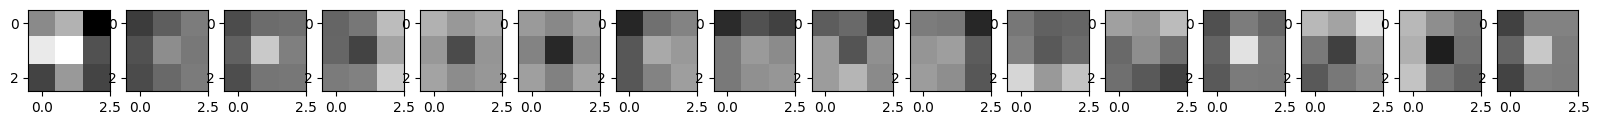

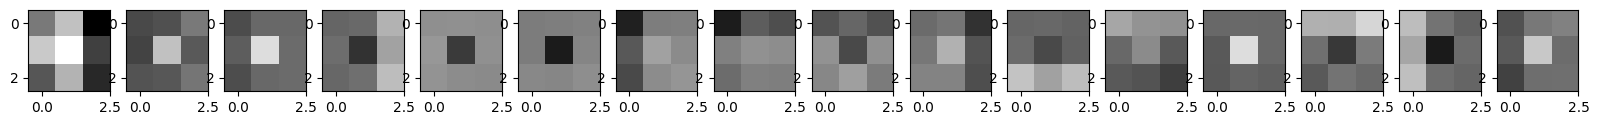

In [17]:
plt.figure(figsize=(20, 5))
vis_conv(model1.backbone_ncas[0])
plt.figure(figsize=(20, 5))
vis_conv(model2.backbone_ncas[0])

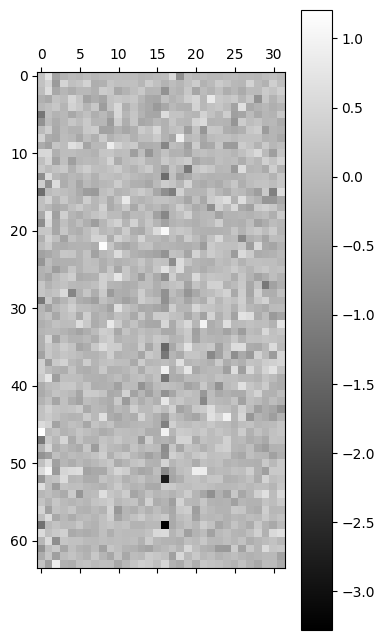

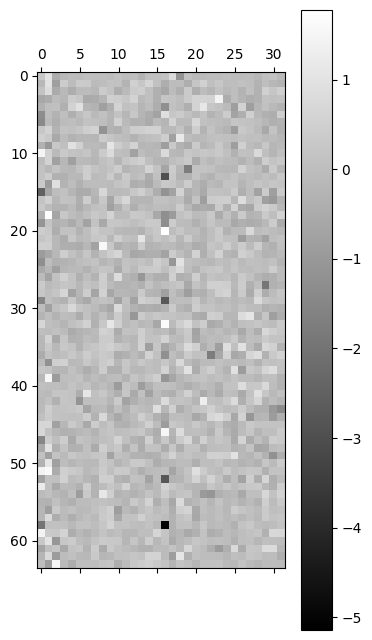

In [23]:
vis_linear(model1.backbone_ncas[0].fc0)
vis_linear(model2.backbone_ncas[0].fc0)

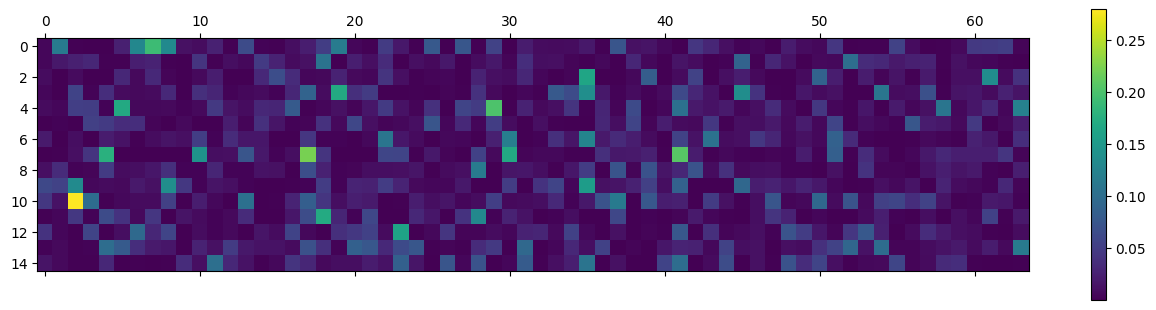

In [30]:

mat = (model1.backbone_ncas[5].fc1.weight.data.cpu().numpy() - model2.backbone_ncas[5].fc1.weight.data.cpu().numpy())**2
assert mat.shape[2] == 1 and mat.shape[3] == 1

plt.matshow(mat[:,:, 0, 0])
plt.colorbar()